## M08 Machine Learning: Classification Challenge

#### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


#### 2. Load the heart disease dataset

In [3]:
df = pd.read_csv('/gdrive/MyDrive/Coding Temple/8 - Machine Learning Classification/Live Session Notebooks/heart.csv')
cols_to_keep = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'target']
df = df[cols_to_keep]
df.head()

,age,sex,cp,trestbps,chol,fbs,target
0,52,1,0,125,212,0,0
1,53,1,0,140,203,1,0
2,70,1,0,145,174,0,0
3,61,1,0,148,203,0,0
4,62,0,0,138,294,1,0


In [4]:
# heart_disease_data = fetch_ucirepo(id=45)

# X = heart_disease_data.data.features
# y = heart_disease_data.data.targets

# all_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','num']
# feature_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']

# # Convert to pandas DataFrame

# X = pd.DataFrame(X)
# y = pd.DataFrame(y)

# df = pd.concat([X, y], axis=1)
# df.head()

In [5]:
df['target'].value_counts()

,count
target,
1,526
0,499


### Data Dictionary:
*  `age`: age in years
*  `sex`: sex (1 = male; 0 = female)
*  `cp`: chest pain type (0-3)
*  `trestbps`: resting blood pressure
*  `chol`: serum cholesterol in mg/dl
*  `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*  `target`: presence of heart disease (1 = yes, 0 = no)

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
target,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1025 non-null   int64
 1   sex       1025 non-null   int64
 2   cp        1025 non-null   int64
 3   trestbps  1025 non-null   int64
 4   chol      1025 non-null   int64
 5   fbs       1025 non-null   int64
 6   target    1025 non-null   int64
dtypes: int64(7)
memory usage: 56.2 KB


In [8]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (1025, 7)

Feature Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'target']

First few rows:
   age  sex  cp  trestbps  chol  fbs  target
0   52    1   0       125   212    0       0
1   53    1   0       140   203    1       0
2   70    1   0       145   174    0       0
3   61    1   0       148   203    0       0
4   62    0   0       138   294    1       0


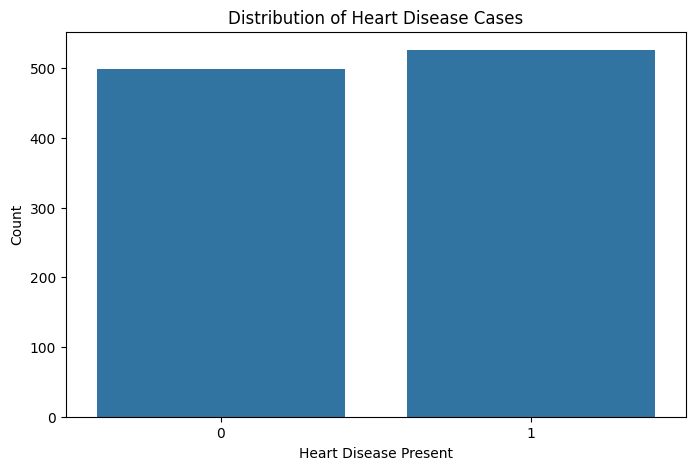

In [9]:
# Check class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
plt.show()

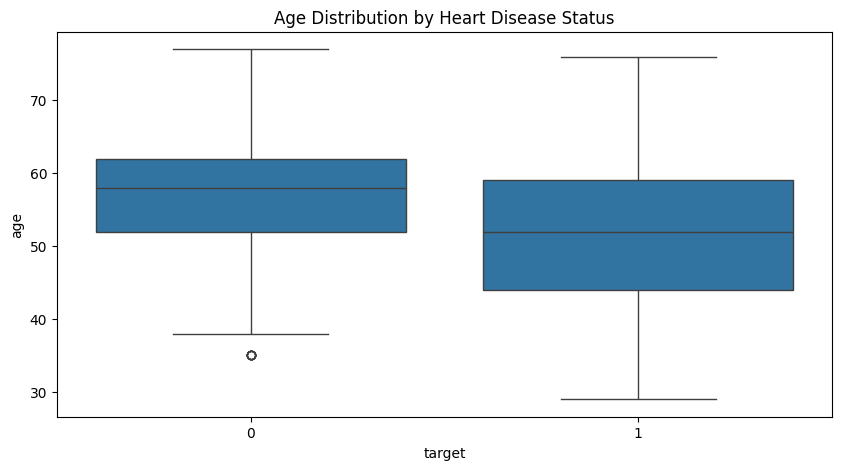

In [10]:
# Age distribution by disease status
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution by Heart Disease Status')
plt.show()

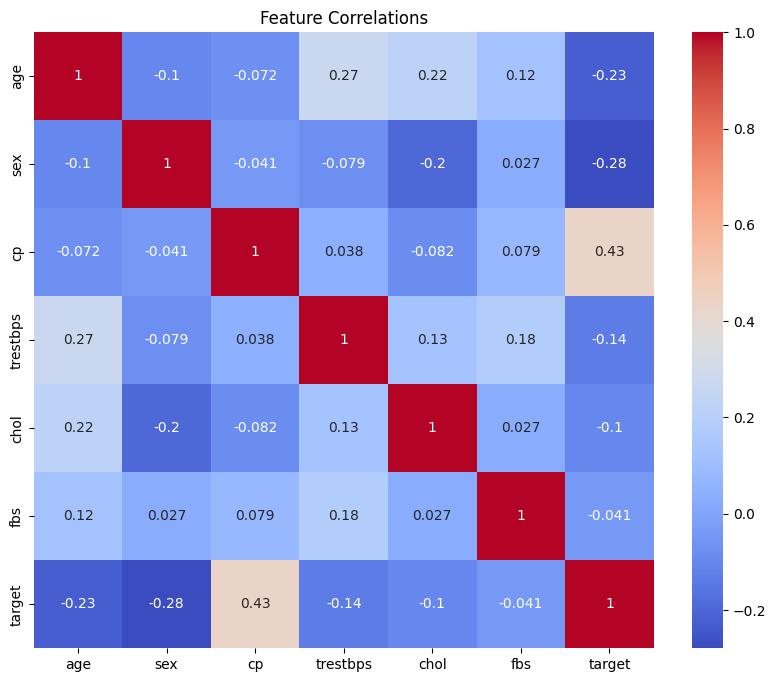

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

#### 3. Data Pre-processing

In [12]:
# Data Preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (820, 6)
Testing set shape: (205, 6)


In [13]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

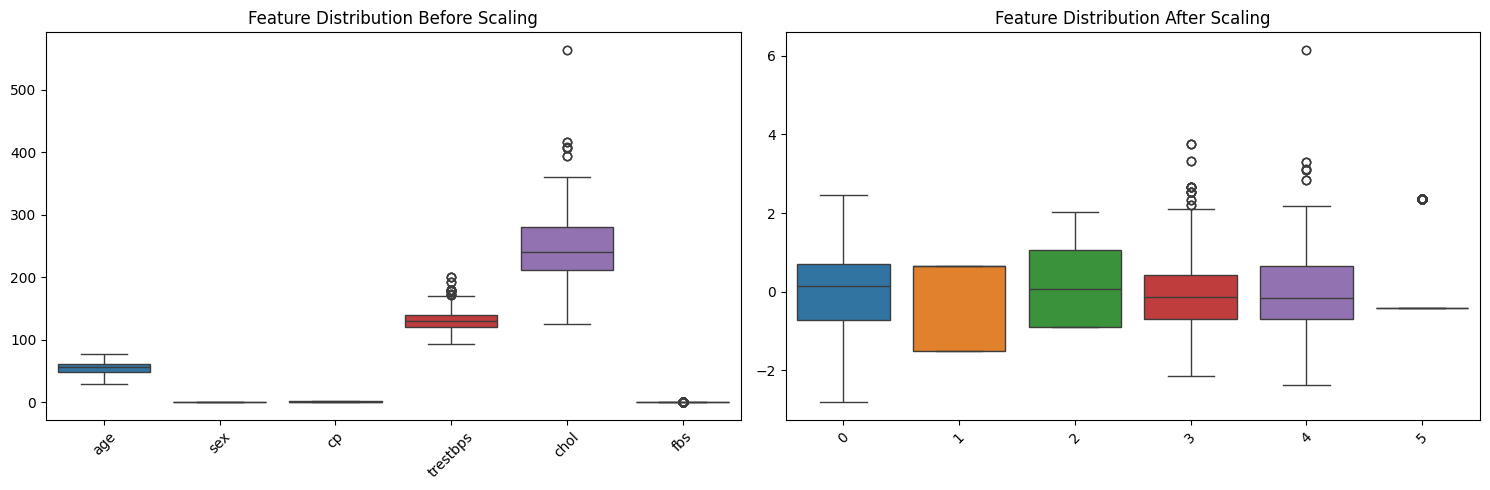

In [14]:
# Visualize scaled vs unscaled data
def plot_scaling_effect():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Before scaling
    sns.boxplot(data=X_train, ax=ax1)
    ax1.set_title('Feature Distribution Before Scaling')
    ax1.tick_params(axis='x', rotation=45)

    # After scaling
    sns.boxplot(data=pd.DataFrame(X_train_scaled), ax=ax2)
    ax2.set_title('Feature Distribution After Scaling')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_scaling_effect()

#### 3. KNN Model and Evaluation

In [15]:
# Model Building
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [17]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")



Model Accuracy: 0.77


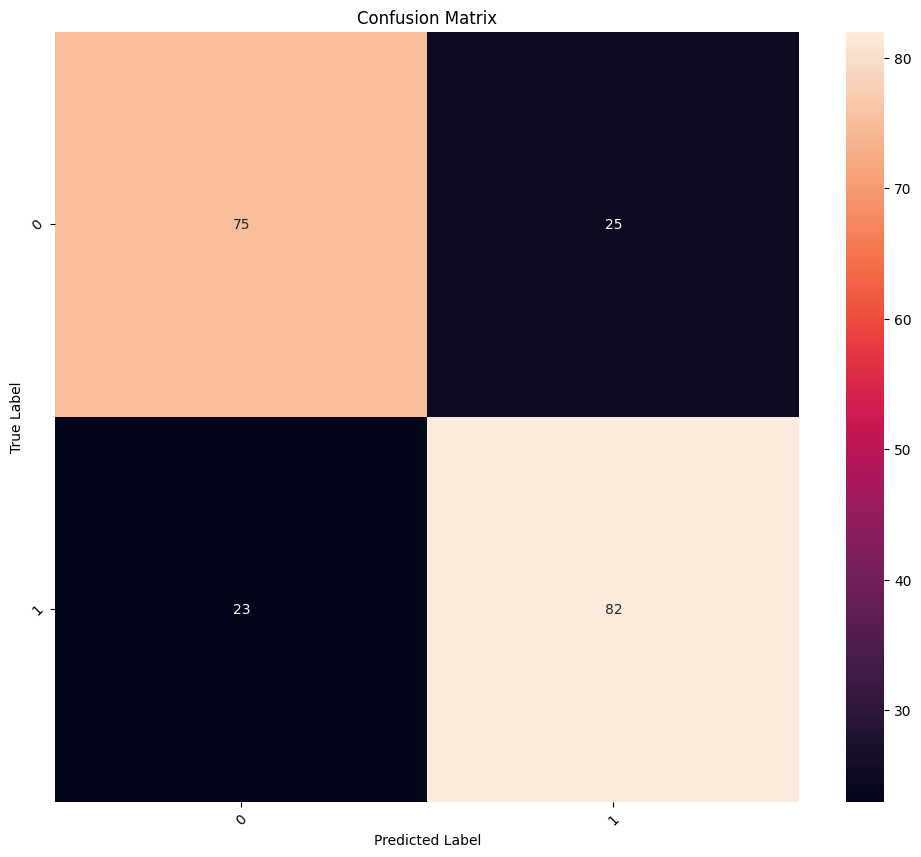

In [18]:

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


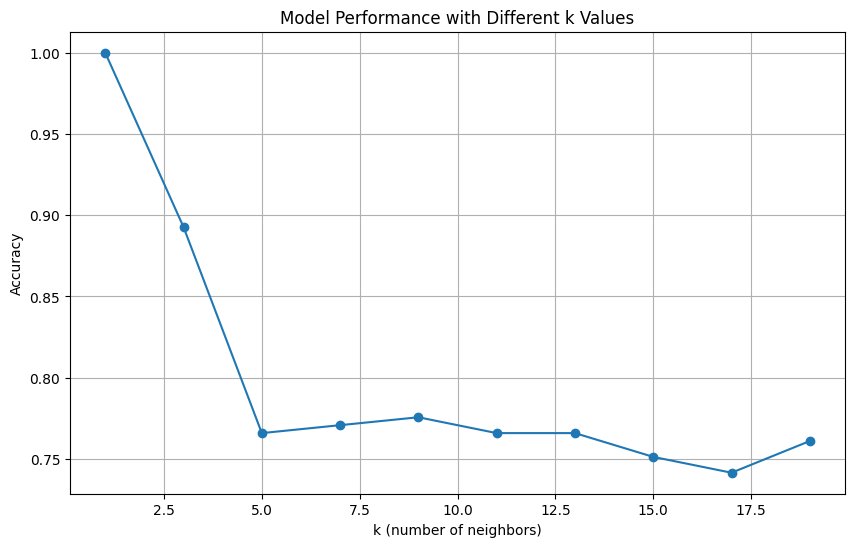

In [19]:
# Analyze model performance for different k values
k_range = range(1, 20, 2)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.title('Model Performance with Different k Values')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [20]:
# Example prediction
def predict_heart_disease_risk(model, scaler, patient_data):
    """
    Make a prediction for a single patient
    """
    scaled_data = scaler.transform([patient_data])
    prediction = model.predict(scaled_data)
    probability = model.predict_proba(scaled_data)
    return prediction[0], probability[0]


# Example patient
sample_patient = [60, 1, 2, 130, 240, 0]  # Example values
prediction, probability = predict_heart_disease_risk(knn, scaler, sample_patient)
print("\nSample Patient Prediction:")
print(f"Prediction: {'Heart Disease' if prediction == 1 else 'No Heart Disease'}")
print(f"Probability: {max(probability)*100:.2f}%")


Sample Patient Prediction:
Prediction: Heart Disease
Probability: 52.63%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
